In [1]:
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.regularizers import l2
from sklearn import datasets
import pandas as pd
import numpy as np
print(tf.__version__)

2.0.0


## Load Data
First get the data.  Sklearn presents the data in a dictionary.  

The target is the price is thousands

Note that X is a dataframe while y is an array!!

In [2]:
bos = datasets.load_boston()

In [3]:
bos

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
x = pd.DataFrame(bos['data'])

In [5]:
x.columns=bos['feature_names']

In [6]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
y = bos['target']

In [8]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Scale Data

Neural Networks are especially sensitive do data scaling.  Nearly all the activation functions saturate at (0,1) or (-1,1)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(x)

# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[12], scaler.min_[12]))
multiplied_by = scaler.scale_[12]
added = scaler.min_[12]

scaled_train_df = pd.DataFrame(scaled_train, columns=x.columns.values)

Note: median values were scaled by multiplying by 0.0275938190 and adding -0.047737


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

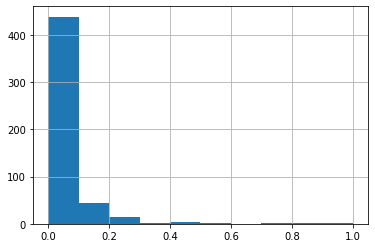

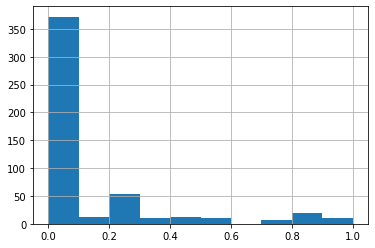

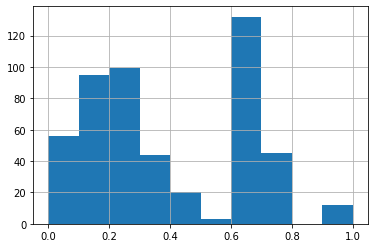

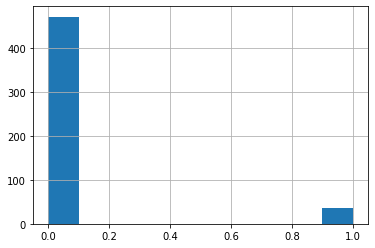

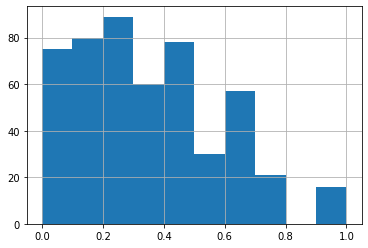

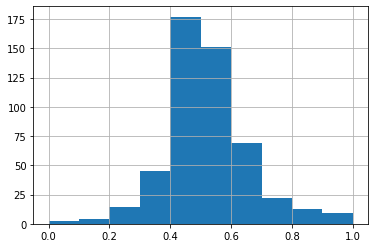

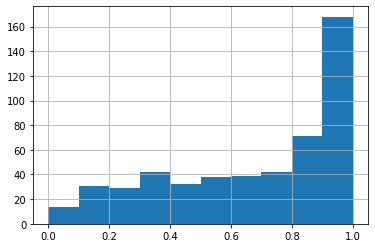

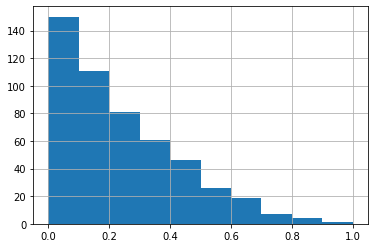

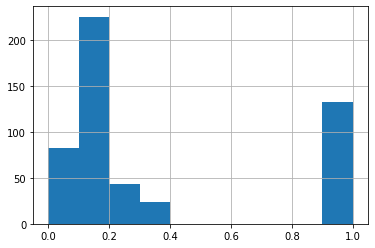

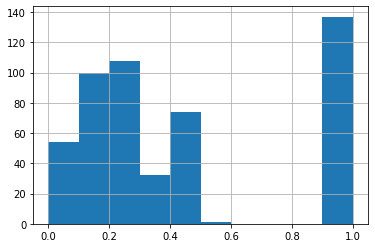

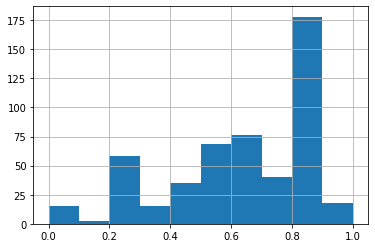

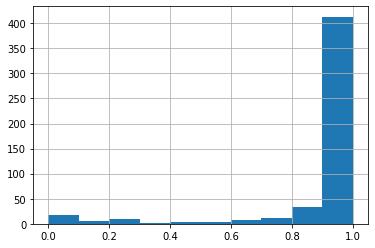

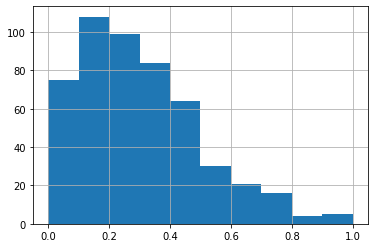

In [11]:
for i in scaled_train_df:
    scaled_train_df[i].hist()
    plt.show()

## Model 
Alright lets get down to business.  We will use the Sequential() class to build a model.  This means we just add layer after layer to the model (in order).

Note that this is NOT the keras package proper.  This is an implementation of the Keras API in tensorflow.  THey are closely related, but this IS Tensorflow (package), not Keras (package)

In [12]:
x.shape

(506, 13)

In [26]:
model = tf.keras.Sequential()
model.add(layers.Dense(100, activation='tanh'))
model.add(layers.Dense(100, activation='tanh'))
model.add(layers.Dense(100, activation='tanh'))
model.add(layers.Dense(100, activation='tanh'))
model.add(layers.Dense(100, activation='tanh'))
model.add(layers.Dense(1))



## Compile Model

The compile step adds an optimizer (solver) and your loss metrics.

In [27]:
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

## Fit model
Now it is time to train

In [28]:
model.fit(scaled_train_df.values, y, epochs=10, batch_size=32)

Train on 506 samples
Epoch 1/10
506/506 [==============================] - 1s 1ms/sample - loss: 275.5001 - mean_squared_error: 275.5001
Epoch 2/10
506/506 [==============================] - 0s 160us/sample - loss: 153.6807 - mean_squared_error: 153.6808
Epoch 3/10
506/506 [==============================] - 0s 162us/sample - loss: 127.4710 - mean_squared_error: 127.4710
Epoch 4/10
506/506 [==============================] - 0s 158us/sample - loss: 110.2462 - mean_squared_error: 110.2462
Epoch 5/10
506/506 [==============================] - 0s 158us/sample - loss: 98.5214 - mean_squared_error: 98.5214
Epoch 6/10
506/506 [==============================] - 0s 154us/sample - loss: 90.9412 - mean_squared_error: 90.9413
Epoch 7/10
506/506 [==============================] - 0s 172us/sample - loss: 86.7387 - mean_squared_error: 86.7387
Epoch 8/10
506/506 [==============================] - 0s 152us/sample - loss: 85.0016 - mean_squared_error: 85.0016
Epoch 9/10
506/506 [=========================

## Visualize that data
Tensorboard allows you to look at your training curves in real time.  All we need to do here is add a "callback" that is executed every epoch end.  Tensorboard writes a summary of the model output.  If you manually build a neural network, you need to add tf.summary operations.

To run tensorboard type

`tensorboard --logdir logs`

Then go to localhost:6006 in your web browser

In [29]:
from time import time
from tensorflow.keras.callbacks import TensorBoard
tb = TensorBoard(log_dir=f"logs\\{time()}")

In [30]:
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [31]:
model.fit(scaled_train_df.values, y, epochs=5, batch_size=4, callbacks=[tb])

Train on 506 samples
Epoch 1/5
506/506 [==============================] - 1s 2ms/sample - loss: 74.5374 - mean_squared_error: 74.5374
Epoch 2/5
506/506 [==============================] - 1s 1ms/sample - loss: 50.7204 - mean_squared_error: 50.7204
Epoch 3/5
506/506 [==============================] - 1s 1ms/sample - loss: 37.1038 - mean_squared_error: 37.1038
Epoch 4/5
506/506 [==============================] - 1s 1ms/sample - loss: 30.3855 - mean_squared_error: 30.3855
Epoch 5/5
506/506 [==============================] - 1s 1ms/sample - loss: 24.8462 - mean_squared_error: 24.8463


## Validate!!
SO far we have used the entire dataset to train.  We know that Prof Slater frown upon this.  In Neural Networks, rahter than a cross validation, a validation split is done.  Lets repeat the experiment with splits


In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_train_df, y, test_size=0.20, random_state=1776)

In [33]:
model_final = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:

model_final.add(layers.Dense(100, activation='sigmoid'))
model_final.add(layers.Dense(100, activation='sigmoid'))
model_final.add(layers.Dense(1))

In [35]:
model_final.compile(optimizer='SGD',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [37]:
model_final.fit(x_train.values, y_train, validation_data=(x_test.values,y_test), epochs=100, batch_size=5, callbacks=[tb])

Train on 404 samples, validate on 102 samples
Epoch 1/100
404/404 [==============================] - 1s 1ms/sample - loss: 96.5154 - mean_squared_error: 96.5154 - val_loss: 113.8945 - val_mean_squared_error: 113.8945
Epoch 2/100
404/404 [==============================] - 0s 822us/sample - loss: 77.8690 - mean_squared_error: 77.8690 - val_loss: 95.6789 - val_mean_squared_error: 95.6789
Epoch 3/100
404/404 [==============================] - 0s 923us/sample - loss: 54.1743 - mean_squared_error: 54.1743 - val_loss: 55.4073 - val_mean_squared_error: 55.4073
Epoch 4/100
404/404 [==============================] - 0s 842us/sample - loss: 46.7451 - mean_squared_error: 46.7451 - val_loss: 49.2571 - val_mean_squared_error: 49.2571
Epoch 5/100
404/404 [==============================] - 0s 862us/sample - loss: 37.6906 - mean_squared_error: 37.6906 - val_loss: 39.8193 - val_mean_squared_error: 39.8193
Epoch 6/100
404/404 [==============================] - 0s 862us/sample - loss: 36.2492 - mean_squar

404/404 [==============================] - 0s 881us/sample - loss: 14.7188 - mean_squared_error: 14.7188 - val_loss: 15.4375 - val_mean_squared_error: 15.4375
Epoch 49/100
404/404 [==============================] - 0s 760us/sample - loss: 14.8296 - mean_squared_error: 14.8296 - val_loss: 18.9363 - val_mean_squared_error: 18.9363
Epoch 50/100
404/404 [==============================] - 0s 822us/sample - loss: 15.1496 - mean_squared_error: 15.1496 - val_loss: 14.8533 - val_mean_squared_error: 14.8533
Epoch 51/100
404/404 [==============================] - 0s 822us/sample - loss: 14.8606 - mean_squared_error: 14.8606 - val_loss: 16.8683 - val_mean_squared_error: 16.8683
Epoch 52/100
404/404 [==============================] - 0s 842us/sample - loss: 14.4031 - mean_squared_error: 14.4031 - val_loss: 24.4085 - val_mean_squared_error: 24.4085
Epoch 53/100
404/404 [==============================] - 0s 802us/sample - loss: 14.8026 - mean_squared_error: 14.8026 - val_loss: 14.6593 - val_mean_squa

Epoch 96/100
404/404 [==============================] - 0s 923us/sample - loss: 12.9459 - mean_squared_error: 12.9459 - val_loss: 12.8948 - val_mean_squared_error: 12.8948
Epoch 97/100
404/404 [==============================] - 0s 802us/sample - loss: 12.7930 - mean_squared_error: 12.7930 - val_loss: 13.5706 - val_mean_squared_error: 13.5706
Epoch 98/100
404/404 [==============================] - 0s 844us/sample - loss: 13.2841 - mean_squared_error: 13.2841 - val_loss: 13.1335 - val_mean_squared_error: 13.1335
Epoch 99/100
404/404 [==============================] - 0s 864us/sample - loss: 12.4478 - mean_squared_error: 12.4478 - val_loss: 12.4663 - val_mean_squared_error: 12.4663
Epoch 100/100
404/404 [==============================] - 0s 842us/sample - loss: 12.9044 - mean_squared_error: 12.9044 - val_loss: 12.1324 - val_mean_squared_error: 12.1324


## Classification?
The only thing we really need to change is the final layer to predict classes

In [39]:
model_iris = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:

model_iris.add(layers.Dense(100, activation='sigmoid'))
model_iris.add(layers.Dense(100, activation='sigmoid'))
model_iris.add(layers.Dense(3 ,activation='sigmoid'),)

model_iris.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [40]:
iris = datasets.load_iris()

In [41]:
x= iris['data']
y = iris['target']
# Why do I not have to scale?
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1776)

In [42]:
model_iris.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100, batch_size=4, callbacks=[tb])

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 4ms/sample - loss: 1.1329 - accuracy: 0.3250 - val_loss: 1.0991 - val_accuracy: 0.3667
Epoch 2/100
120/120 [==============================] - 0s 1ms/sample - loss: 1.1053 - accuracy: 0.3250 - val_loss: 1.0914 - val_accuracy: 0.3667
Epoch 3/100
120/120 [==============================] - 0s 1ms/sample - loss: 1.0978 - accuracy: 0.4250 - val_loss: 1.0897 - val_accuracy: 0.6667
Epoch 4/100
120/120 [==============================] - 0s 1ms/sample - loss: 1.0943 - accuracy: 0.4167 - val_loss: 1.0882 - val_accuracy: 0.7000
Epoch 5/100
120/120 [==============================] - 0s 1ms/sample - loss: 1.0922 - accuracy: 0.3500 - val_loss: 1.0879 - val_accuracy: 0.6667
Epoch 6/100
120/120 [==============================] - 0s 1ms/sample - loss: 1.0926 - accuracy: 0.3750 - val_loss: 1.0865 - val_accuracy: 0.5667
Epoch 7/100
120/120 [==============================] - 0s 1ms/sample - loss: 1.0913 -

Epoch 57/100
120/120 [==============================] - 0s 1ms/sample - loss: 0.7382 - accuracy: 0.7417 - val_loss: 0.7035 - val_accuracy: 0.7667
Epoch 58/100
120/120 [==============================] - 0s 1ms/sample - loss: 0.7289 - accuracy: 0.7583 - val_loss: 0.6872 - val_accuracy: 0.8000
Epoch 59/100
120/120 [==============================] - 0s 1ms/sample - loss: 0.7038 - accuracy: 0.7833 - val_loss: 0.6925 - val_accuracy: 0.6667
Epoch 60/100
120/120 [==============================] - 0s 1ms/sample - loss: 0.7002 - accuracy: 0.7000 - val_loss: 0.6617 - val_accuracy: 0.9333
Epoch 61/100
120/120 [==============================] - 0s 1ms/sample - loss: 0.6841 - accuracy: 0.7750 - val_loss: 0.6490 - val_accuracy: 1.0000
Epoch 62/100
120/120 [==============================] - 0s 1ms/sample - loss: 0.6745 - accuracy: 0.7500 - val_loss: 0.6380 - val_accuracy: 0.8667
Epoch 63/100
120/120 [==============================] - 0s 1ms/sample - loss: 0.6661 - accuracy: 0.7417 - val_loss: 0.6275 -

In [43]:
np.argmax(model_iris.predict(x_test),axis=1)

array([2, 1, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0,
       0, 1, 0, 1, 2, 2, 2, 0], dtype=int64)

In [44]:
y_test

array([2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0,
       0, 1, 0, 1, 2, 2, 2, 0])

In [45]:
W = model_final.get_weights()

In [46]:
len(W)

6

In [47]:
x = np.linspace(-1,1,10000)
y = 0.2+0.4*x*x+0.3*x*np.sin(15*x)+0.05*np.cos(50*x)

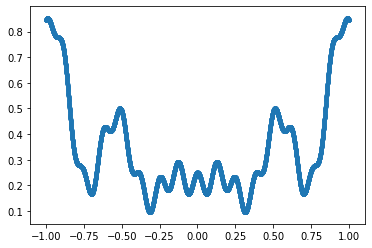

In [48]:
plt.scatter(x,y,marker=".")

In [49]:
model_1 = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:

model_1.add(layers.Dense(1000, activation='relu',kernel_initializer='glorot_uniform',bias_initializer='glorot_uniform'))
model_1.add(layers.Dense(1000, activation='relu',kernel_initializer='glorot_uniform',bias_initializer='glorot_uniform'))
model_1.add(layers.Dense(1000, activation='relu',kernel_initializer='glorot_uniform',bias_initializer='glorot_uniform'))
model_1.add(layers.Dense(1000, activation='relu',kernel_initializer='glorot_uniform',bias_initializer='glorot_uniform'))
model_1.add(layers.Dense(1, activation='relu'))
model_1.compile(optimizer=tf.optimizers.Adam(),loss='mean_squared_error')
model_1.fit(x, y, epochs=5, batch_size=32)

Train on 10000 samples
Epoch 1/5
10000/10000 [==============================] - 1s 146us/sample - loss: 0.0110
Epoch 2/5
10000/10000 [==============================] - 1s 110us/sample - loss: 0.0022
Epoch 3/5
10000/10000 [==============================] - 1s 112us/sample - loss: 0.0016
Epoch 4/5
10000/10000 [==============================] - 1s 109us/sample - loss: 0.0014
Epoch 5/5
10000/10000 [==============================] - 1s 110us/sample - loss: 0.0014


In [50]:
preds = model_1.predict(x)

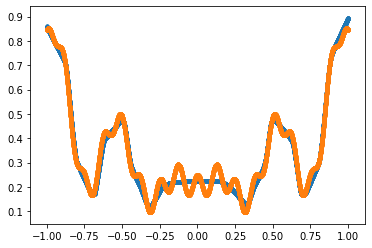

In [51]:
plt.scatter(x,preds,marker=".")
plt.scatter(x,y,marker=".")

In [ ]:
y_train.head()